# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#Bimi Bisht
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
temp_units = "imperial"

# Import API key 
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# OpenWeatherMap API Key

base_url=f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [5]:
print("Beginning Data Retrival")
print("------------------------------")
set_count = 1
record = 1
weather_data = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],"Lat":[],"Lng":[],"Max Temp":[],"Wind Speed": []}
for city in cities:
    weather_response = requests.get(base_url + city)
    weather_response_json = weather_response.json()


    
    if weather_response.status_code == 200:
        weather_data["City"].append(city)
        weather_data["Cloudiness"].append(weather_response_json['clouds']['all'])
        weather_data["Country"].append(weather_response_json['sys']['country'])
        weather_data["Date"].append(weather_response_json['dt'])
        weather_data["Humidity"].append(weather_response_json['main']['humidity'])
        weather_data["Lat"].append(weather_response_json['coord']['lat'])
        weather_data["Lng"].append(weather_response_json['coord']['lon'])
        weather_data["Max Temp"].append(weather_response_json['main']['temp_max'])
        weather_data["Wind Speed"].append(weather_response_json['wind']['speed'])
        if record <= 50:
            print(f"Processing Record {record} of Set {set_count} | {city}")
            record += 1 
        else:
            record = 0
            set_count += 1
            print(f"Processing Record {record} of Set {set_count} | {city}")
            record += 1
    else:
        print("City not found. Skipping...")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")



Beginning Data Retrival
------------------------------
Processing Record 1 of Set 1 | luyang
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | aksarka
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | jatiroto
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | piacabucu
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | noumea
Processing Record 10 of Set 1 | fairbanks
Processing Record 11 of Set 1 | imbituba
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | bubaque
Processing Record 14 of Set 1 | severo-yeniseyskiy
City not found. Skipping...
City not found. Skipping...
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | chicama
Processing Record 17 of Set 1 | maragogi
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | port alfred
City not found. Skipping...
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | bussel

Processing Record 31 of Set 4 | puerto ayora
Processing Record 32 of Set 4 | tucuman
City not found. Skipping...
Processing Record 33 of Set 4 | ulladulla
Processing Record 34 of Set 4 | faya
Processing Record 35 of Set 4 | jacqueville
Processing Record 36 of Set 4 | that phanom
City not found. Skipping...
Processing Record 37 of Set 4 | gizo
Processing Record 38 of Set 4 | pangkalanbuun
Processing Record 39 of Set 4 | richards bay
Processing Record 40 of Set 4 | zheleznodorozhnyy
Processing Record 41 of Set 4 | pudozh
City not found. Skipping...
Processing Record 42 of Set 4 | fort saint james
City not found. Skipping...
Processing Record 43 of Set 4 | balkanabat
Processing Record 44 of Set 4 | muros
Processing Record 45 of Set 4 | college
Processing Record 46 of Set 4 | ilulissat
Processing Record 47 of Set 4 | naze
Processing Record 48 of Set 4 | bondo
Processing Record 49 of Set 4 | la macarena
Processing Record 50 of Set 4 | umm lajj
Processing Record 0 of Set 5 | afonso claudio
P

Processing Record 14 of Set 8 | atar
Processing Record 15 of Set 8 | newark
Processing Record 16 of Set 8 | padang
Processing Record 17 of Set 8 | nouadhibou
Processing Record 18 of Set 8 | boueni
Processing Record 19 of Set 8 | deputatskiy
Processing Record 20 of Set 8 | ambagarh chauki
Processing Record 21 of Set 8 | natchez
Processing Record 22 of Set 8 | mackenzie
Processing Record 23 of Set 8 | houston
Processing Record 24 of Set 8 | mezen
Processing Record 25 of Set 8 | salas
Processing Record 26 of Set 8 | tarsus
Processing Record 27 of Set 8 | oyama
Processing Record 28 of Set 8 | neka
Processing Record 29 of Set 8 | buzdyak
Processing Record 30 of Set 8 | kuvshinovo
Processing Record 31 of Set 8 | mangai
City not found. Skipping...
Processing Record 32 of Set 8 | hambantota
Processing Record 33 of Set 8 | ngaoundere
Processing Record 34 of Set 8 | talara
Processing Record 35 of Set 8 | ola
Processing Record 36 of Set 8 | mont-de-marsan
Processing Record 37 of Set 8 | desaguade

Processing Record 47 of Set 11 | hornepayne
Processing Record 48 of Set 11 | mecca
Processing Record 49 of Set 11 | mpika
Processing Record 50 of Set 11 | ortakoy
Processing Record 0 of Set 12 | yarmouth
Processing Record 1 of Set 12 | tuy hoa
Processing Record 2 of Set 12 | san policarpo
Processing Record 3 of Set 12 | antalaha
-------------------------
Data Retrieval Complete
-------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a dictionary for establishing dataframe
#weather_dict = {
   ## "Cloudiness":cloudiness,
   # "Country":country,
   # "Date":date,
   # "Humidity":humidity,
   # "Lat":lat,
   # "Lng":lng,
   # "Max Temp":max_temp,
    #"Wind Speed":wind_speed
#}

In [8]:
weather_dataframe = pd.DataFrame(weather_data)

In [9]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,luyang,0,CN,1554512400,60,31.88,117.26,68.00,11.18
1,severo-kurilsk,88,RU,1554514427,95,50.68,156.12,33.11,13.13
2,aksarka,12,RU,1554514427,80,66.56,67.80,19.52,13.02
3,ushuaia,40,AR,1554512400,80,-54.81,-68.31,41.00,39.15
4,jatiroto,92,ID,1554514427,100,-7.61,109.46,78.29,4.41


In [10]:

#weather_dataframe.to_csv(output_data_file)
weather_dataframe.to_csv('output_data_file/cities.csv', encoding='utf-8', index=False)


In [11]:
weather_dataframe.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [12]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,luyang,0,CN,1554512400,60,31.88,117.26,68.00,11.18
1,severo-kurilsk,88,RU,1554514427,95,50.68,156.12,33.11,13.13
2,aksarka,12,RU,1554514427,80,66.56,67.80,19.52,13.02
3,ushuaia,40,AR,1554512400,80,-54.81,-68.31,41.00,39.15
4,jatiroto,92,ID,1554514427,100,-7.61,109.46,78.29,4.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

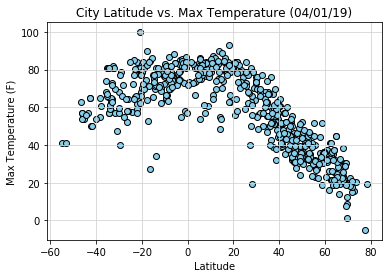

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (04/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

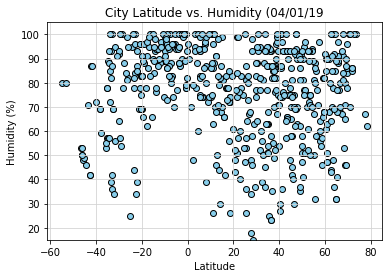

In [14]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (04/01/19")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../lat_vs_humi.png")
plt.show()

#### Latitude vs. Cloudiness Plot

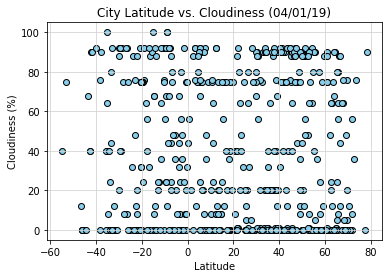

In [15]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (04/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../lat_vs_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

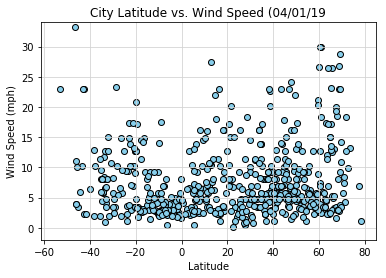

In [16]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (04/01/19")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../lat_vs_WSpeed.png")
plt.show()

__1st Obseved Trend:__ 

The warmest points are near the equator. The temperature begins after latitute 20 degree onward.

__2nd Obseved Trend:__ 

There does not seem to be a relationship for cloudiness and latitude.  0, 75, and 90 seem to show grouping, but that may indicate trends in reporting. Zero is the easiest--a clear day will be marked as zero. 

__3rd Obseved Trend:__ 

The Wind speed along Latitude chart does not seem to be related to the latitude. Most of the  sample cities have low wind speed.